Basic Data Analysis with pandas and matplotlib

Required Data File

The data is scraped from the website worldometer.com using the Python library BeautifulSoup. The data is stored in corona.csv data file.

The code for this is in app.py. Please run that and obtain the output before proceeding further.

In [21]:
import numpy as np
import pandas as pd

Importing data set 'corona.csv' created using app.py

In [23]:

df = pd.read_csv('corona.csv',delimiter = ',',thousands = ',',encoding='ISO-8859-1')
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\r\nNorth America\r\n,39072935,4567.0,"876,200",357.0,31184620,2264.0,7012115
1,\r\nAsia\r\n,45716026,18614.0,"592,281",296.0,39819417,21864.0,5304328
2,\r\nSouth America\r\n,26416486,NaN,"718,992",NaN,23963543,NaN,1733951
3,\r\nEurope\r\n,45892771,28861.0,"1,045,378",1135.0,41467758,61125.0,3379635
4,\r\nAfrica\r\n,4708640,2.0,"125,938",NaN,4243248,NaN,339454
...,...,...,...,...,...,...,...,...
709,Total:,45765621,97719.0,"1,041,959",2499.0,41249967,144849.0,3473695
710,Total:,4699198,8877.0,"125,704",304.0,4235490,7685.0,338004
711,Total:,65146,789.0,"1,218",9.0,61222,299.0,2706
712,Total:,721,NaN,15,NaN,706,NaN,0


Removing duplicate rows

In [24]:
df[df.Country == 'India']

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
9,India,24046809,689.0,"262,350",NaN,20079599,6232.0,3704860
248,India,24046120,343288.0,"262,350",3999.0,20073367,344931.0,3710403
486,India,23702832,362406.0,"258,351",4126.0,19728436,351786.0,3716045


We can notice duplicates. Let's remove them!vvvvvvvvvvvvvvvv

In [25]:
df1 = df.drop_duplicates(subset = ['Country'])
df1.shape

(231, 8)

We can see that the new DataFrame, df1, has less rows than the original df. So, duplicate rows have been removed.

In [26]:
df.shape

(714, 8)

In [27]:
df1.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\r\nNorth America\r\n,39072935,4567.0,"876,200",357.0,31184620,2264.0,7012115
1,\r\nAsia\r\n,45716026,18614.0,"592,281",296.0,39819417,21864.0,5304328
2,\r\nSouth America\r\n,26416486,NaN,"718,992",NaN,23963543,NaN,1733951
3,\r\nEurope\r\n,45892771,28861.0,"1,045,378",1135.0,41467758,61125.0,3379635
4,\r\nAfrica\r\n,4708640,2.0,"125,938",NaN,4243248,NaN,339454


In [28]:
df1.dtypes

Country            object
TotalCases          int64
NewCases          float64
TotalDeaths        object
NewDeaths         float64
TotalRecovered      int64
NewRecovered      float64
ActiveCases         int64
dtype: object

In [29]:
df1[df1.Country == 'India']

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
9,India,24046809,689.0,"262,350",NaN,20079599,6232.0,3704860


**Deleting unneeded rows**

In [34]:
df1 = df1.sort_values(['TotalCases'],ascending = False)


In [39]:
df1

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
7,World,161872986,52047.0,"3,360,026",1788.0,140740607,85241.0,17772353
3,\r\nEurope\r\n,45892771,28861.0,"1,045,378",1135.0,41467758,61125.0,3379635
1,\r\nAsia\r\n,45716026,18614.0,"592,281",296.0,39819417,21864.0,5304328
0,\r\nNorth America\r\n,39072935,4567.0,"876,200",357.0,31184620,2264.0,7012115
8,USA,33626097,NaN,"598,540",NaN,26667199,NaN,6360358
...,...,...,...,...,...,...,...,...
224,Vanuatu,4,NaN,1,NaN,3,NaN,0
225,Marshall Islands,4,NaN,,NaN,4,NaN,0
226,Samoa,3,NaN,,NaN,2,NaN,1
227,Saint Helena,2,NaN,,NaN,2,NaN,0


Dropping the row 'Total', as it seems incorrect. Dropping it on the basis of its index 230

In [38]:
df1 = df1.drop(230)


KeyError: '[230] not found in axis'

In [40]:
df1.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
7,World,161872986,52047.0,"3,360,026",1788.0,140740607,85241.0,17772353
3,\r\nEurope\r\n,45892771,28861.0,"1,045,378",1135.0,41467758,61125.0,3379635
1,\r\nAsia\r\n,45716026,18614.0,"592,281",296.0,39819417,21864.0,5304328
0,\r\nNorth America\r\n,39072935,4567.0,"876,200",357.0,31184620,2264.0,7012115
8,USA,33626097,NaN,"598,540",NaN,26667199,NaN,6360358


In [43]:
df1.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
7,World,161872986,52047.0,"3,360,026",1788.0,140740607,85241.0,17772353
3,\r\nEurope\r\n,45892771,28861.0,"1,045,378",1135.0,41467758,61125.0,3379635
1,\r\nAsia\r\n,45716026,18614.0,"592,281",296.0,39819417,21864.0,5304328
0,\r\nNorth America\r\n,39072935,4567.0,"876,200",357.0,31184620,2264.0,7012115
8,USA,33626097,NaN,"598,540",NaN,26667199,NaN,6360358
2,\r\nSouth America\r\n,26416486,NaN,"718,992",NaN,23963543,NaN,1733951
9,India,24046809,689.0,"262,350",NaN,20079599,6232.0,3704860
10,Brazil,15436827,NaN,"430,596",NaN,13979329,NaN,1026902
11,France,5841129,NaN,"107,250",NaN,4999079,NaN,734800
12,Turkey,5083996,NaN,"44,059",NaN,4856763,NaN,183174


Dropping the continents statistics as they aren't of much use...

In [44]:
df1 = df1.drop(index = [0,1,2,3,4,5,6])

In [45]:
df1.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
7,World,161872986,52047.0,"3,360,026",1788.0,140740607,85241.0,17772353
8,USA,33626097,NaN,"598,540",NaN,26667199,NaN,6360358
9,India,24046809,689.0,"262,350",NaN,20079599,6232.0,3704860
10,Brazil,15436827,NaN,"430,596",NaN,13979329,NaN,1026902
11,France,5841129,NaN,"107,250",NaN,4999079,NaN,734800


After the deletion of rows, the index values need to be updated too. We do so in the next step

In [46]:
df1 = df1.reset_index(drop = True)

In [47]:
df1

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,World,161872986,52047.0,"3,360,026",1788.0,140740607,85241.0,17772353
1,USA,33626097,NaN,"598,540",NaN,26667199,NaN,6360358
2,India,24046809,689.0,"262,350",NaN,20079599,6232.0,3704860
3,Brazil,15436827,NaN,"430,596",NaN,13979329,NaN,1026902
4,France,5841129,NaN,"107,250",NaN,4999079,NaN,734800
...,...,...,...,...,...,...,...,...
218,Vanuatu,4,NaN,1,NaN,3,NaN,0
219,Marshall Islands,4,NaN,,NaN,4,NaN,0
220,Samoa,3,NaN,,NaN,2,NaN,1
221,Saint Helena,2,NaN,,NaN,2,NaN,0


**Sorting on the basis of specific columns**

Let's find out the 10 regions with the least Total Cases till now

In [48]:
df2 = df1.sort_values(['TotalCases'],inplace = False)

In [49]:
df2.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
222,Micronesia,1,NaN,,NaN,1,NaN,0
221,Saint Helena,2,NaN,,NaN,2,NaN,0
220,Samoa,3,NaN,,NaN,2,NaN,1
219,Marshall Islands,4,NaN,,NaN,4,NaN,0
218,Vanuatu,4,NaN,1,NaN,3,NaN,0
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0
216,Western Sahara,10,NaN,1,NaN,8,NaN,1
215,Montserrat,20,NaN,1,NaN,19,NaN,0
214,Solomon Islands,20,NaN,,NaN,20,NaN,0
213,Saint Pierre Miquelon,25,NaN,,NaN,25,NaN,0


In [50]:
df2 = df2.reset_index(drop = True)

**Changing column datatype for further operations**

Now let's see which countries have the most number of deaths recorded.

In [51]:
df3 = df1.sort_values(['TotalDeaths'],ascending = False,inplace= False)

In [52]:
df3

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
160,CAR,6866,NaN,95,NaN,5112,NaN,1659
168,Gibraltar,4286,NaN,94,NaN,4189,NaN,3
98,Finland,89532,NaN,930,NaN,46000,NaN,42602
120,Australia,29957,2.0,910,NaN,28861,NaN,186
165,San Marino,5083,NaN,90,NaN,4968,NaN,25
...,...,...,...,...,...,...,...,...
209,Macao,49,NaN,,NaN,49,NaN,0
207,Anguilla,109,NaN,,NaN,89,NaN,20
206,New Caledonia,124,NaN,,NaN,58,NaN,66
203,Dominica,178,NaN,,NaN,176,NaN,2


But here we see that the sorting isn't correct. This might have something to do with the datatype of the column 'TotalDeaths'.
Let's check.

In [53]:
df3.dtypes

Country            object
TotalCases          int64
NewCases          float64
TotalDeaths        object
NewDeaths         float64
TotalRecovered      int64
NewRecovered      float64
ActiveCases         int64
dtype: object

We can see that the datatype of 'TotalDeaths' is 'object'. For sorting, it must be in numeric form - either float or int.
Here the problem is due to the fact that commas are used as separators in the TotalDeath values. So we need to remove them.

In [54]:
df3["TotalDeaths"] = df3["TotalDeaths"].str.replace(",","")

In [55]:
df3

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
160,CAR,6866,NaN,95,NaN,5112,NaN,1659
168,Gibraltar,4286,NaN,94,NaN,4189,NaN,3
98,Finland,89532,NaN,930,NaN,46000,NaN,42602
120,Australia,29957,2.0,910,NaN,28861,NaN,186
165,San Marino,5083,NaN,90,NaN,4968,NaN,25
...,...,...,...,...,...,...,...,...
209,Macao,49,NaN,,NaN,49,NaN,0
207,Anguilla,109,NaN,,NaN,89,NaN,20
206,New Caledonia,124,NaN,,NaN,58,NaN,66
203,Dominica,178,NaN,,NaN,176,NaN,2


We can see some empty values for TotalDeaths in the bottom rows. For sorting, we need to replace them with NaN. So while conversion, we 'coerce' the function to replace any value ot cannot covert, to NaN.

In [56]:
df3["TotalDeaths"] = pd.to_numeric(df3["TotalDeaths"],errors='coerce')

In [57]:
df3 = df3.sort_values(['TotalDeaths'],ascending = False)

In [58]:
df3 = df3.reset_index(drop=True)

In [59]:
df3

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,World,161872986,52047.0,3360026.0,1788.0,140740607,85241.0,17772353
1,USA,33626097,NaN,598540.0,NaN,26667199,NaN,6360358
2,Brazil,15436827,NaN,430596.0,NaN,13979329,NaN,1026902
3,India,24046809,689.0,262350.0,NaN,20079599,6232.0,3704860
4,Mexico,2375115,3632.0,219901.0,311.0,1895483,2247.0,259731
...,...,...,...,...,...,...,...,...
218,Macao,49,NaN,NaN,NaN,49,NaN,0
219,Anguilla,109,NaN,NaN,NaN,89,NaN,20
220,New Caledonia,124,NaN,NaN,NaN,58,NaN,66
221,Dominica,178,NaN,NaN,NaN,176,NaN,2


Now we can see that the sorting is correct. So let's find out the required values. Note that the row with the highest value for deaths recorded is World. It doesn't make much sense to include it in our comparison, as it is evident that it will always be the highest value. So we will print the 10 countries, starting from index 1. Also, we only want the country name and the total deaths recorded.

In [60]:
df3[['Country','TotalDeaths']].loc[1:10]

,Country,TotalDeaths
1,USA,598540.0
2,Brazil,430596.0
3,India,262350.0
4,Mexico,219901.0
5,UK,127651.0
6,Italy,123745.0
7,Russia,115116.0
8,France,107250.0
9,Germany,86276.0
10,Colombia,79760.0


**Data Visualisation using matplotlib**

Now let's look at some data visualisation. The matplotlib library allows us to plot data in various forms.

Importing matplotlib for drawing plots

In [61]:
%matplotlib inline

Without passing any parameters, the plot() takes the index as the x-axis, every other columns as y-axis, and the kind of graph as line-graph.

<Axes: >

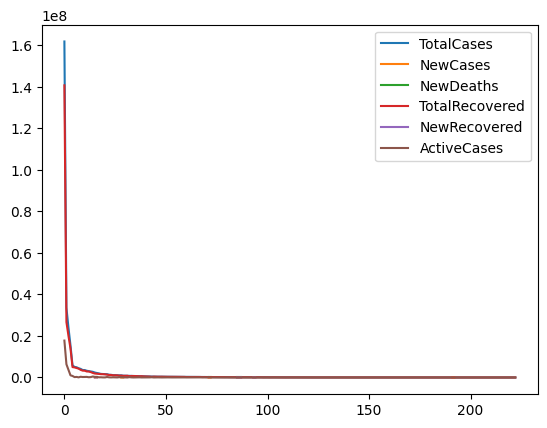

In [62]:
df1.plot()

Here we are going to show the countries with the highest death toll(as found in df3), depicting the number of deaths on the y-axis in various graphical forms.

**Vertical Bar Graph**

<Axes: xlabel='Country'>

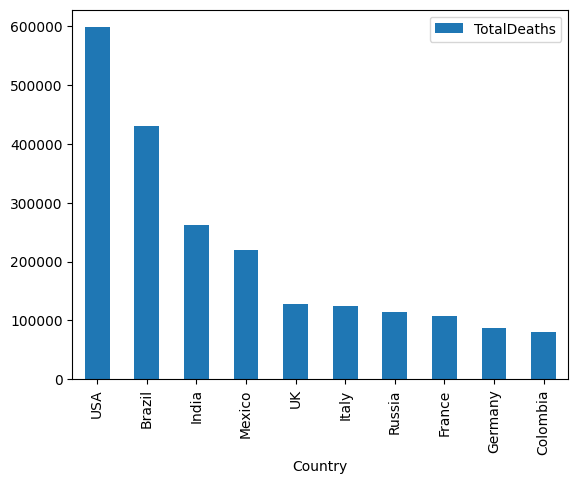

In [63]:
df3.loc[1:10].plot(x='Country',y='TotalDeaths',kind = 'bar')

**Horizontal Bar Graph**

<Axes: ylabel='Country'>

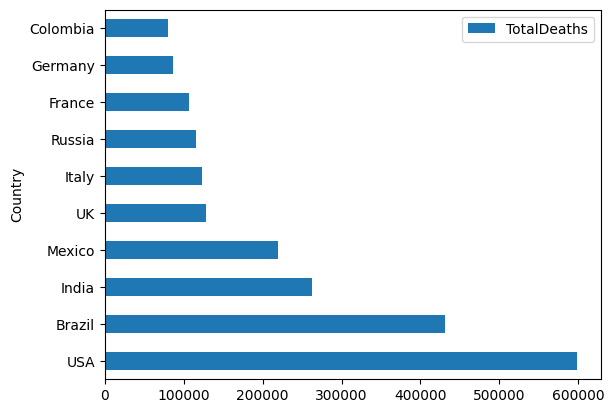

In [64]:
df3.loc[1:10].plot(x='Country',y='TotalDeaths',kind = 'barh')

**Pie Chart**

The pie chart has a different format. Instead of x and y axis, we pass the desired value as y and give the corresponding labels in the 'labels' parameter.

In [65]:
labels = df3['Country'].loc[1:10]

<Axes: ylabel='TotalDeaths'>

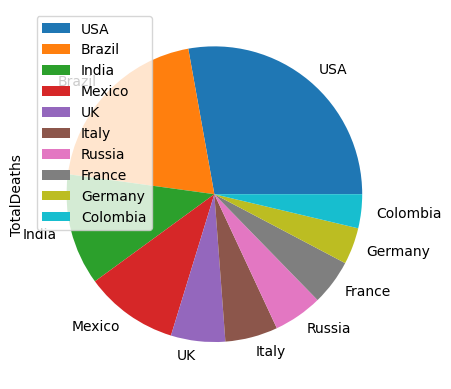

In [66]:
df3.loc[1:10].plot(kind='pie',labels=labels,y='TotalDeaths')

ven though we get a pie chart, there are improvements to be made.

The legend table is covering the pie chart, and is not needed.
It would be nice to show the % value of each pie slice.
The pie chart should be larger.
To carry out these modifications, the code will look like this...

Text(0, 0.5, '')

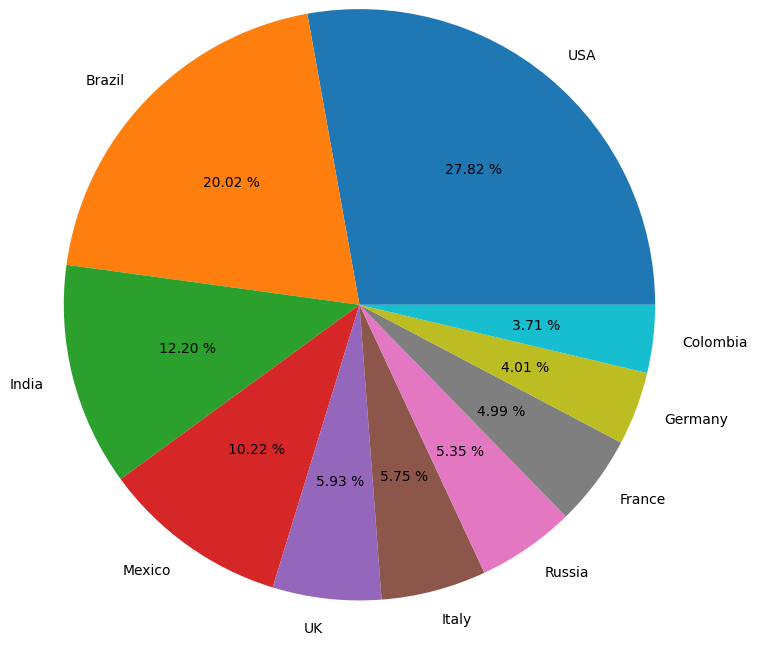

In [67]:
df3.loc[1:10].plot(kind='pie',labels=labels,y='TotalDeaths',legend=None,autopct='%.2f %%',radius = 2).set_ylabel('')